<a href="https://colab.research.google.com/github/Himanshu23696/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries


In [110]:
#For image reading and resizing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.transform import resize
#For converting color images to grayscale
from skimage.color import rgb2gray
#For accessing the path
import os
#For splitting the dataset
from sklearn.model_selection import train_test_split
#For applying the algorithm and determining the best 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#For Determining accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##Gathering Data


> **The model predicts whether the given image is of either of a car or of a dog**







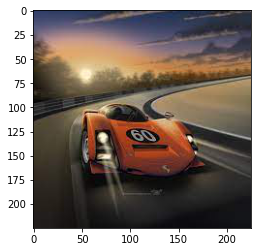

In [135]:
img = imread('/content/drive/MyDrive/ML-mini project/Car/1.jpg')
plt.imshow(img)

##Preprocessing data

In [112]:
main_dir = '/content/drive/MyDrive/ML-mini project'
categories = ['Car','Basketball']

In [122]:
flat_data = []
tgt = []

In [123]:
for i in categories:
  path = os.path.join(main_dir,i)
  #print(path)
  for x in os.listdir(path):
    img_arr = imread(os.path.join(path,x))
    gry = rgb2gray(img_arr)
    new = resize(gry,(150,150))    
    flat_data.append(np.ndarray.flatten(new))
    # plt.imshow(new)
    # plt.show()
    tgt.append(i)

##Converting to gray scale and adding to a 1d array

In [124]:
flat_data = np.array(flat_data)
tgt = np.array(tgt)

In [125]:
df = pd.DataFrame(flat_data)
df['Target'] = tgt

In [126]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999963,1.000000,1.000000,1.000000,0.999866,0.995624,0.995624,0.999866,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999786,0.997122,0.999665,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Car
1,0.992157,0.992155,0.991860,0.989238,0.989375,0.991465,0.989504,0.988166,0.989664,0.991734,0.992024,0.992061,0.992155,0.991909,0.988675,0.988016,0.986643,0.985142,0.984437,0.983494,0.981419,0.982683,0.980439,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980407,0.982177,0.983722,0.984280,0.986390,0.986475,0.986578,0.986601,0.986663,0.987666,0.988082,...,0.286589,0.278930,0.278269,0.280128,0.289610,0.283762,0.266425,0.261094,0.256401,0.266056,0.579318,0.610578,0.598366,0.616010,0.622762,0.609005,0.608245,0.620397,0.619311,0.619289,0.615798,0.617757,0.582728,0.578457,0.582673,0.574541,0.567320,0.561012,0.577082,0.568668,0.570936,0.549571,0.586710,0.566298,0.577593,0.564790,0.576279,0.585636,0.605609,Car
2,0.091783,0.096526,0.101218,0.092839,0.079067,0.072573,0.069745,0.067729,0.075732,0.071614,0.051976,0.057810,0.085855,0.095212,0.081650,0.066006,0.060136,0.052310,0.047534,0.050021,0.049852,0.044966,0.041152,0.039249,0.042540,0.047328,0.048897,0.057240,0.077847,0.091650,0.101627,0.150150,0.264522,0.405526,0.507602,0.533635,0.460341,0.256917,0.146032,0.128148,...,0.004065,0.008376,0.014245,0.009055,0.016218,0.038467,0.048783,0.404604,0.533011,0.485806,0.511790,0.513183,0.512214,0.519265,0.508525,0.522348,0.512025,0.516255,0.519007,0.515097,0.513591,0.484371,0.520021,0.519075,0.495440,0.516931,0.531361,0.544884,0.511073,0.515913,0.494333,0.511081,0.526206,0.518889,0.525313,0.563038,0.544332,0.603250,0.618952,Car
3,0.462589,0.457305,0.449193,0.437937,0.424060,0.407607,0.383216,0.356720,0.331490,0.306460,0.284752,0.262659,0.246651,0.229115,0.206429,0.181393,0.159557,0.145013,0.133993,0.128123,0.125356,0.125448,0.125800,0.127055,0.126731,0.126428,0.127444,0.128212,0.129487,0.130095,0.130937,0.131329,0.132168,0.135530,0.138104,0.138448,0.139114,0.139467,0.137928,0.136030,...,0.045152,0.047899,0.046012,0.046202,0.049008,0.048455,0.047335,0.047798,0.039870,0.033121,0.035840,0.038239,0.034429,0.032097,0.030161,0.025412,0.024755,0.027013,0.027733,0.029970,0.031707,0.032037,0.033948,0.032161,0.028443,0.030443,0.028606,0.026918,0.031479,0.034456,0.032368,0.031535,0.031541,0.032033,0.034595,0.034318,0.030038,0.031888,0.034704,Car
4,0.248101,0.248101,0.248101,0.248101,0.248101,0.245161,0.244180,0.244180,0.244180,0.244180,0.242042,0.235637,0.235637,0.235637,0.235637,0.235637,0.235637,0.235637,0.235637,0.235637,0.235637,0.235442,0.235377,0.235377,0.235377,0.235801,0.235942,0.236259,0.232587,0.229646,0.226986,0.223628,0.234073,0.231871,0.229685,0.227007,0.225713,0.221466,0.217600,0.217287,...,0.036082,0.043921,0.043923,0.043923,0.043923,0.043923,0.043551,0.043427,0.043427,0.043427,0.043427,0.043672,0.044409,0.045144,0.047348,0.048084,0.050289,0.054703,0.054704,0.054704,0.054704,0.054704,0.054704,0.055685,0.055686,0.056667,0.057404,0.059490,0.065006,0.065007,0.065007,0.065007,0.065007,0.065007,0.065007,0.065007,0.065007,0.065007,0.064271,Car


##Splitting the data set into train and test

In [127]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,stratify=y)

##Applying Hyperparameter tuning followed by classification Algorithm

In [128]:
model = SVC()
param = {
     'C':[0.1,1,2,3,4,5,6,7,8,9,10,100,1000,8],
     'kernel':['rbf','linear','poly']
    #'algorithm':[‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’],
    #'weights':[‘uniform’, ‘distance’]
}
grid = GridSearchCV(model,param,cv=5)

**Takes a bit longer**

In [129]:
grid.fit(x_train,y_train)
grid.best_params_

{'C': 3, 'kernel': 'rbf'}

In [130]:
model = SVC(C=3,kernel='rbf')
model.fit(x_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [131]:
y_pred = model.predict(x_test)

##Model Evaluation

In [133]:
accuracy_score(y_pred,y_test)

1.0

In [134]:
confusion_matrix(y_pred,y_test)


array([[8, 0],
       [0, 8]])

In [136]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         8
         Car       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



##Prediction for new Image